## Unesco Completion Rate for Education Univariate Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json

In [2]:
# df_unesco = pd.read_csv('unesco-completion-rate-primary-education-clean.csv')
# df_unesco = pd.read_csv('unesco-completion-rate-lower-secondary-education-clean.csv')
df_unesco = pd.read_csv('unesco-completion-rate-upper-secondary-education-clean.csv')

In [3]:
df_unesco.head()

,SDG_IND,indicator,country,year,completion_value,ID
0,CR_3,"Completion rate, upper secondary education, bo...",Czechia,2011,92.25000,CSFR-CZE
1,CR_3,"Completion rate, upper secondary education, bo...",Czechia,2013,92.68000,CSFR-CZE
2,CR_3,"Completion rate, upper secondary education, bo...",Czechia,2014,94.42000,CSFR-CZE
3,CR_3_F,"Completion rate, upper secondary education, fe...",Barbados,2012,97.06369,BRB
4,CR_3_URB,"Completion rate, upper secondary education, ur...",Israel,2012,87.81000,ISR


In [4]:
df_unstack_years = df_unesco.pivot_table(columns=['year'], index=["country", 'ID'], values=['completion_value'], fill_value=np.nan)

df_unstack_years['avg'] = df_unstack_years.mean(axis=1)
df_unstack_years.head()

completion_value                                              \
year                        2011       2012       2013       2014       2015   
country     ID                                                                 
Afghanistan AFG        16.835587        NaN        NaN        NaN  27.169863   
Albania     ALB              NaN        NaN        NaN        NaN        NaN   
Algeria     DZA              NaN        NaN  28.601206        NaN        NaN   
Angola      AGO              NaN        NaN        NaN        NaN  16.283170   
Argentina   ARG        64.223333  64.613333  62.566667  62.053333        NaN   

                                                             avg  
year                  2016       2017       2018 2019             
country     ID                                                    
Afghanistan AFG        NaN        NaN        NaN  NaN  22.002725  
Albania     ALB        NaN  79.319486        NaN  NaN  79.319486  
Algeria     DZA        NaN        NaN        NaN  NaN  28.601206  
Angola      AGO        NaN        NaN        NaN  NaN  16.283170  
Argentina   ARG  64.396667  68.646667  70.606667  NaN  65.300952

In [5]:
df_unstack_years.describe()['avg']


count    140.000000
mean      53.542850
std       28.988711
min        3.584748
25%       23.916991
50%       56.794439
75%       81.954208
max       95.427582
Name: avg, dtype: float64

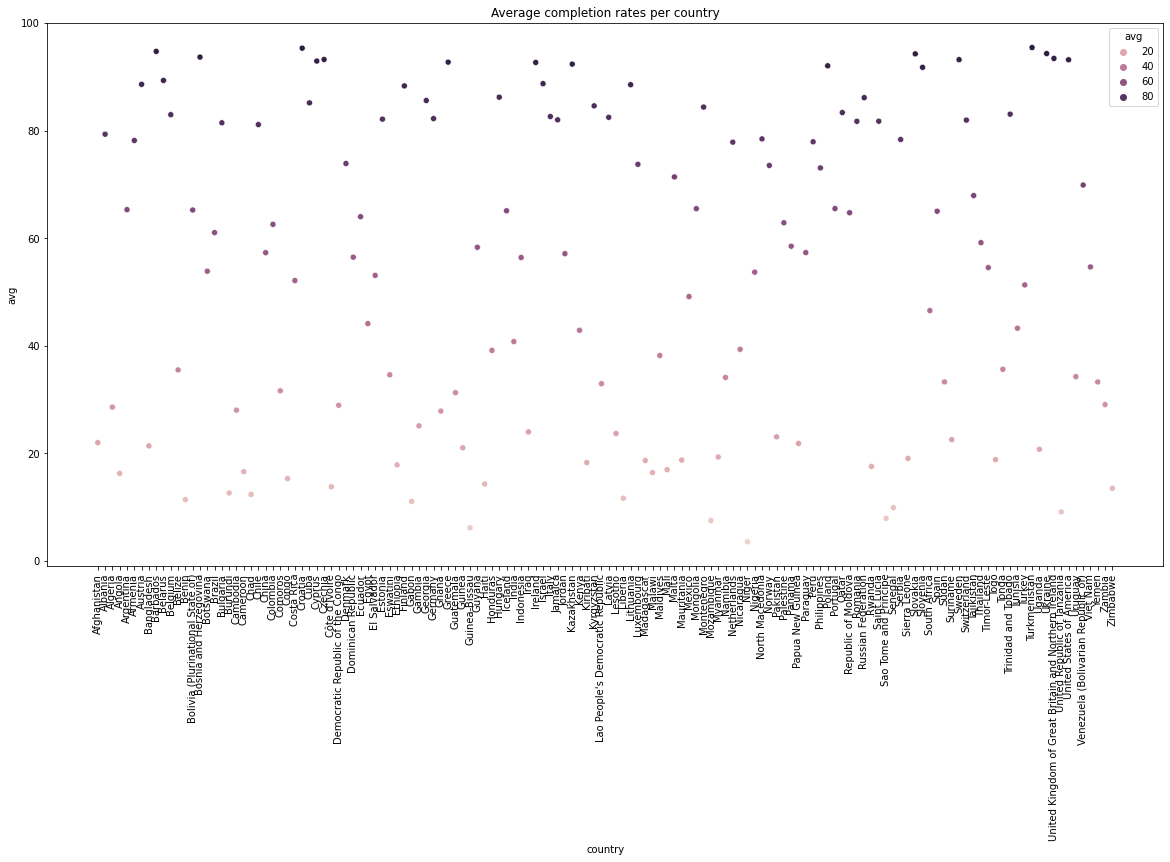

In [6]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.title('Average completion rates per country')
plt.xticks(rotation=90)

fig = sns.scatterplot( 
    x=df_unstack_years.index.get_level_values('country'),
    y=df_unstack_years['avg'], 
    hue=df_unstack_years['avg'])

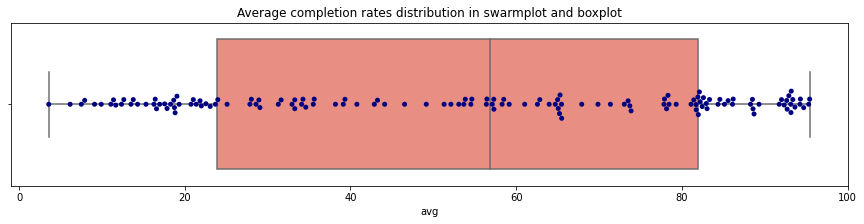

In [7]:
fig, ax = plt.subplots(figsize=(15, 3))
plt.title('Average completion rates distribution in swarmplot and boxplot')

sns.boxplot(x=df_unstack_years['avg'], color='salmon')
fig = sns.swarmplot(x=df_unstack_years['avg'], color="navy")

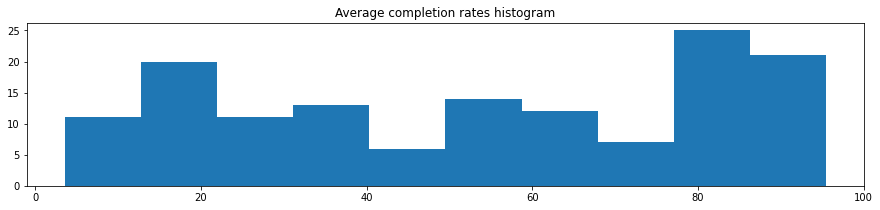

In [8]:
fig, ax = plt.subplots(figsize=(15, 3))
plt.title('Average completion rates histogram')

fig = plt.hist(df_unstack_years['avg'])

## Unesco Completion Rate for Education Multivariate Analysis

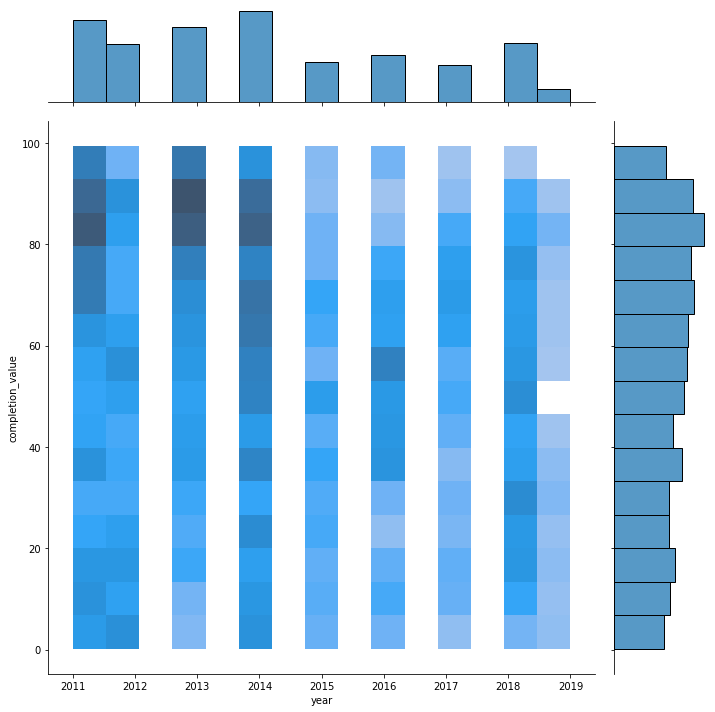

In [9]:
sns.jointplot(data=df_unesco, x='year', y='completion_value', kind='hist', height=10)

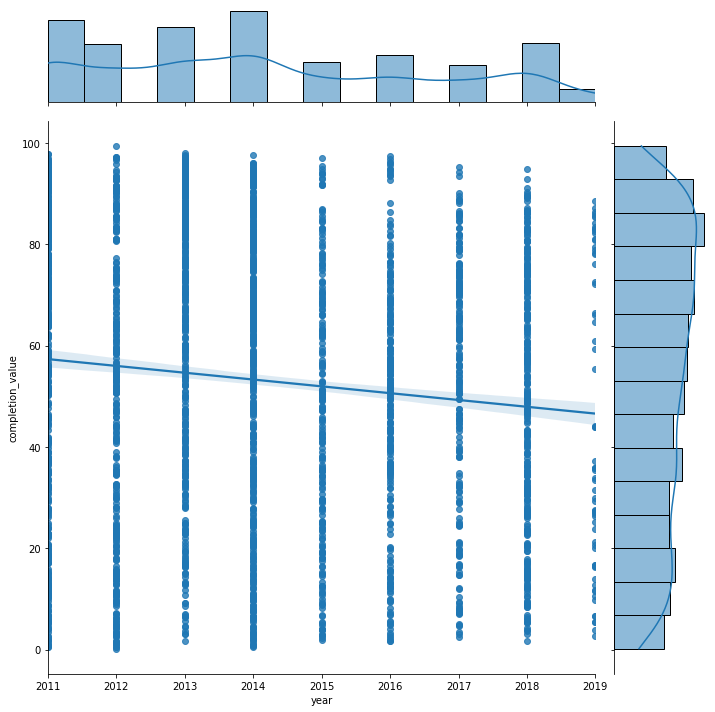

In [10]:
sns.jointplot(data=df_unesco, x='year', y='completion_value', kind='reg', height=10)

## Unesco and Pisa Scores

In [11]:
df_pisa = pd.read_csv('PISA_SCORES_xl_clean.csv')
df_pisa

,COUNTRY_NAME,READING_AVG,MATH_AVG,SCIENCE_AVG,ID
0,OECD average,487.0,489.0,489.0,NaN
1,B-S-J-Z (China),555.0,591.0,590.0,CHN-BSJZ
2,Singapore,549.0,569.0,551.0,SGP
3,Macao (China),525.0,558.0,544.0,CHN-MO
4,Hong Kong (China),524.0,551.0,517.0,CHN-HKG
...,...,...,...,...,...
74,Lebanon,353.0,393.0,384.0,LBN
75,Kosovo,353.0,366.0,365.0,XK
76,Dominican Republic,342.0,325.0,336.0,DOM
77,Philippines,340.0,353.0,357.0,PHL


In [12]:
df_unstack_years_lean = df_unstack_years.copy()
df_unstack_years_lean = df_unstack_years_lean.reset_index(level=['country', 'ID'] )
df_unstack_years_lean = df_unstack_years_lean[['ID', 'avg']]
df_unstack_years_lean.columns = ['ID', 'avg']

df_unstack_years_lean.head()

,ID,avg
0,AFG,22.002725
1,ALB,79.319486
2,DZA,28.601206
3,AGO,16.283170
4,ARG,65.300952


In [13]:
df_merged = df_pisa.merge(df_unstack_years_lean)
df_merged.head()

,COUNTRY_NAME,READING_AVG,MATH_AVG,SCIENCE_AVG,ID,avg
0,Estonia,523.0,523.0,530.0,USSR-EST,82.118000
1,Finland,520.0,507.0,522.0,FIN,88.294000
2,Ireland,518.0,500.0,496.0,IRL,92.654667
3,Poland,512.0,516.0,511.0,POL,92.032667
4,Sweden,506.0,502.0,499.0,SWE,93.174000


<AxesSubplot:>

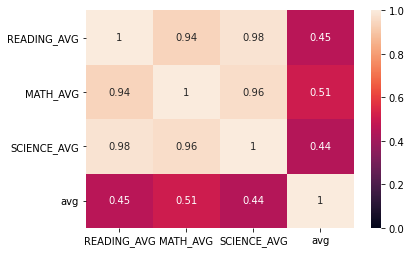

In [14]:
df_merged.corr()
sns.heatmap(df_merged.corr(), annot=True, vmin=0, vmax=1)

### Unesco and Pisa Scores | Univariate

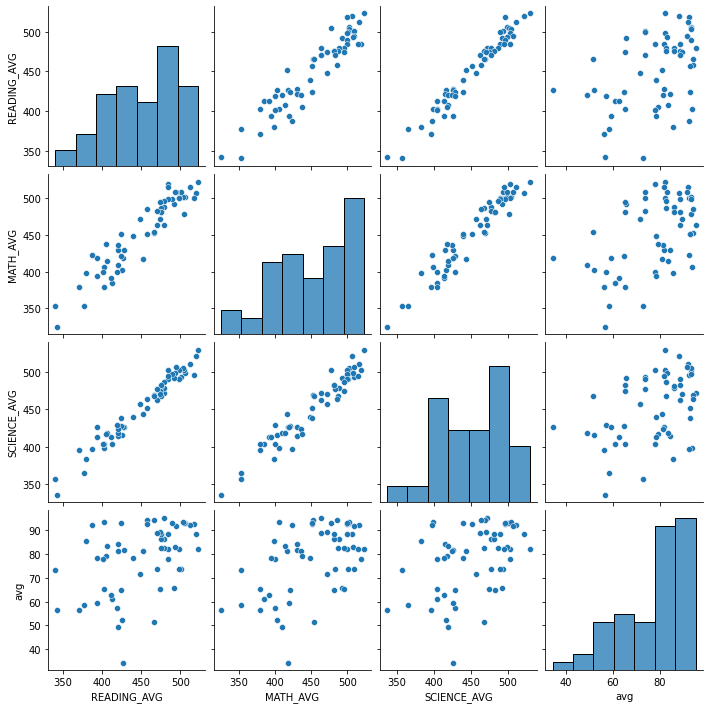

In [15]:
sns.pairplot(df_merged)

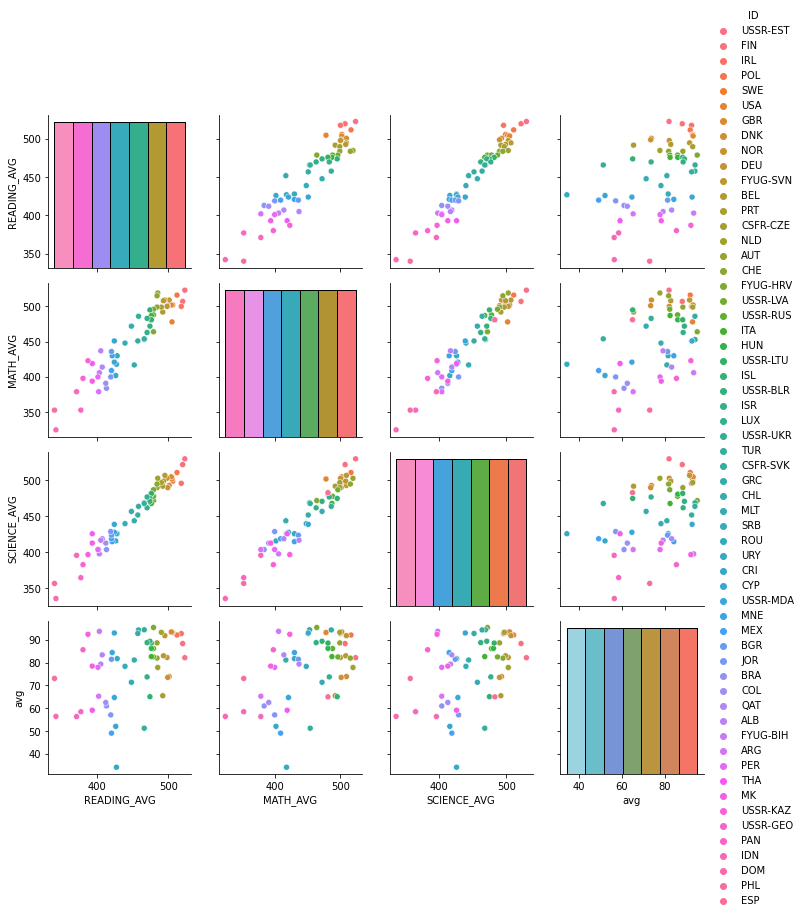

In [16]:
grid = sns.PairGrid(df_merged, hue='ID')
grid.map_diag(sns.histplot)
grid.map_offdiag(sns.scatterplot)
grid.add_legend()


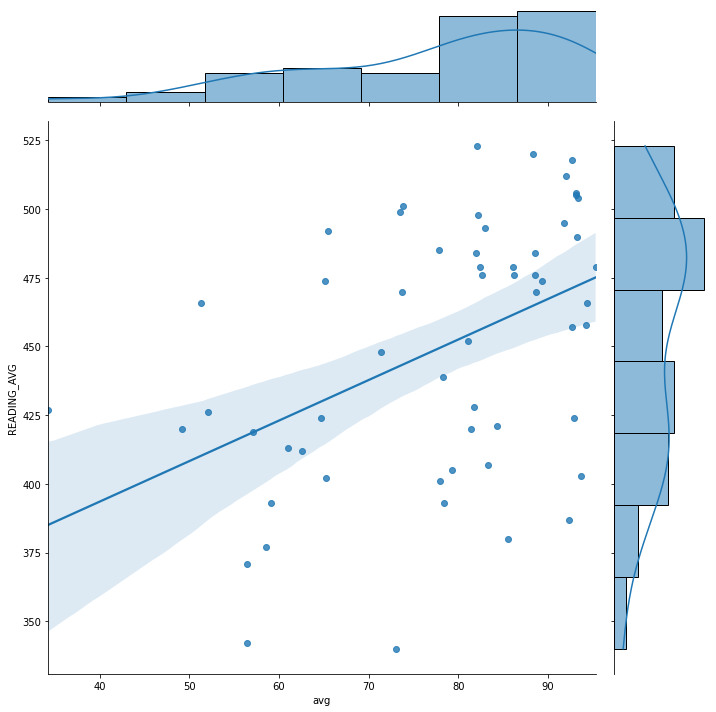

In [17]:
# fig, avg = plt.subplot()
# sns.displot(data=df_merged, x="avg", y="READING_AVG", kind='kde', height=10)
sns.jointplot(data=df_merged, x="avg", y="READING_AVG", kind='reg', height=10)

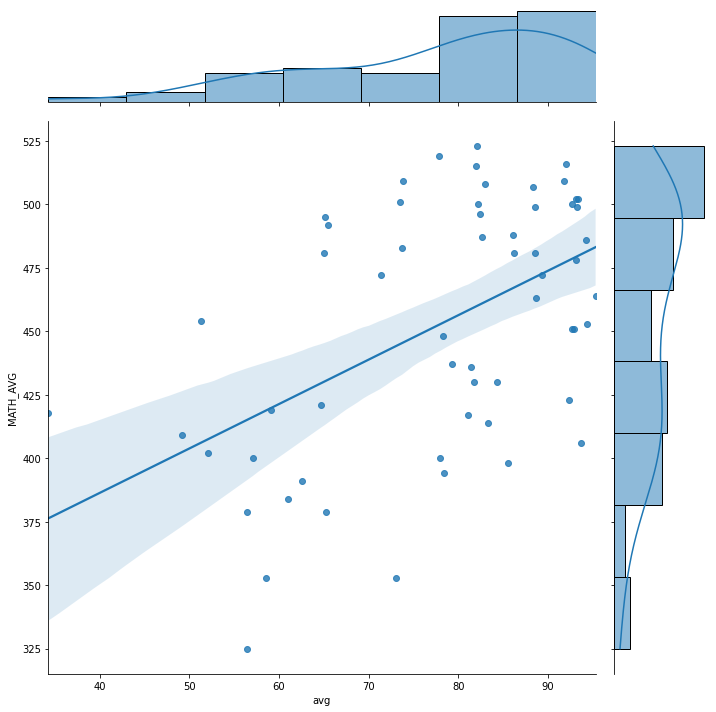

In [18]:
sns.jointplot(data=df_merged, x="avg", y="MATH_AVG", kind='reg', height=10)


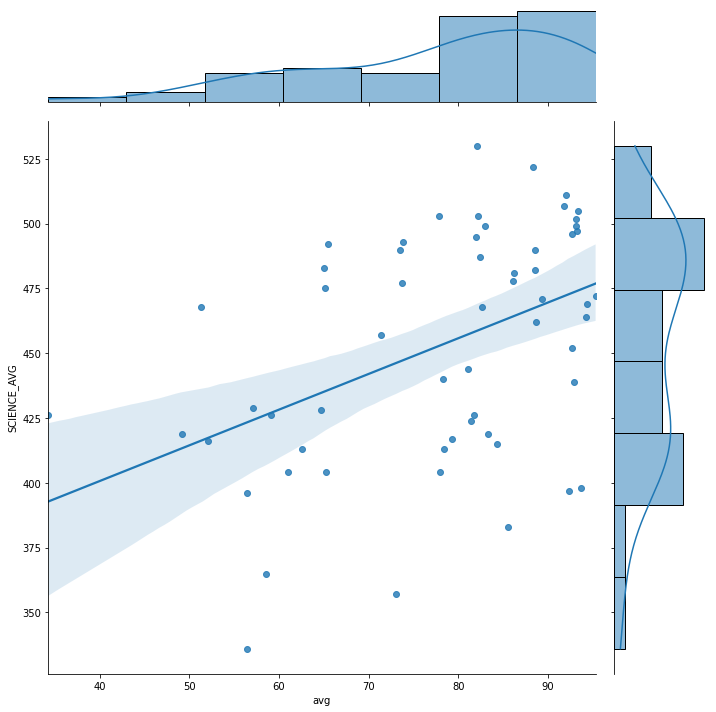

In [19]:
sns.jointplot(data=df_merged, x="avg", y="SCIENCE_AVG", kind='reg', height=10)
